# Data Training and Testing

In [26]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from tqdm import tqdm

from sklearn.metrics import \
    classification_report, \
    plot_confusion_matrix, \
    confusion_matrix, \
    roc_curve, \
    auc

In [27]:
def load_data(path) -> pd.DataFrame:
    df = pd.read_csv(path)
    return df

In [4]:
df = load_data('../csv_data/user_1.csv')

In [5]:
df

,Unnamed: 0,timestamp,dist_s,angle_s,mean_dist,average_mouse_speed,useful,useless,class
0,0,2022-04-15 19:28:49,263.674,69.3421,5316.49,0,0,0,2
1,1,2022-04-15 19:28:52,521.615,0.0000,5034.37,0,0,1,2
2,2,2022-04-15 19:28:53,1155.380,0.0000,5892.10,0,0,2,2
3,3,2022-04-15 19:28:54,1329.600,0.0000,6705.91,0,0,0,2
4,4,2022-04-15 19:28:55,1369.910,70.4558,6572.16,0,0,1,2
...,...,...,...,...,...,...,...,...,...
9727,9727,2022-04-15 22:27:02,0.000,0.0000,NaN,31,0,4,2
9728,9728,2022-04-15 22:27:03,0.000,0.0000,NaN,10,0,2,2
9729,9729,2022-04-15 22:27:04,0.000,0.0000,NaN,0,0,0,2
9730,9730,2022-04-15 22:27:05,0.000,0.0000,NaN,0,0,0,2


In [21]:
df = df.fillna(0)
data_X = df.drop(columns = ['timestamp', 'class'])
data_y = df['class']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3)

In [23]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [37]:
y_hat = model.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       989
           1       0.98      0.98      0.98       499
           2       0.90      0.80      0.85        65
           3       0.98      0.99      0.99      1367

    accuracy                           0.98      2920
   macro avg       0.96      0.94      0.95      2920
weighted avg       0.98      0.98      0.98      2920



<AxesSubplot:ylabel='Frequency'>

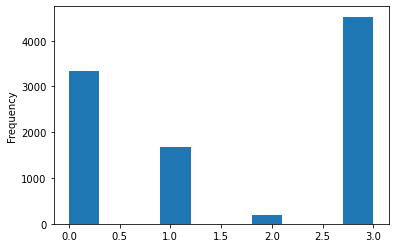

In [41]:
df['class'].plot.hist()